<a href="https://colab.research.google.com/github/tracy2811/24-DataScience-Projects/blob/master/BostonHousePrice/BostonHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston House Price

## Attributes

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks/Boston

/content/drive/My Drive/Colab Notebooks/Boston


[source](http://lib.stat.cmu.edu/datasets/boston)

**Variables in order:**
 
 0. CRIM     per capita crime rate by town
 
 1. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 2. INDUS    proportion of non-retail business acres per town
 
 3. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 4. NOX      nitric oxides concentration (parts per 10 million)
 
 5. RM       average number of rooms per dwelling
 
 6. AGE      proportion of owner-occupied units built prior to 1940
 
 7. DIS      weighted distances to five Boston employment centres
 
 8. RAD      index of accessibility to radial highways
 
 9. TAX      full-value property-tax rate per $10,000
 
 10. PTRATIO  pupil-teacher ratio by town
 
 11. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 12. LSTAT    % lower status of the population
 
 13. MEDV     Median value of owner-occupied homes in $1000's


## Read Dataset

In [0]:
import pandas as pd
df = pd.read_csv('housing.csv', sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
              'TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
df.shape

(506, 14)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


There is no missing value

Text(0.5, 1.0, 'General Statistics of House Dataset')

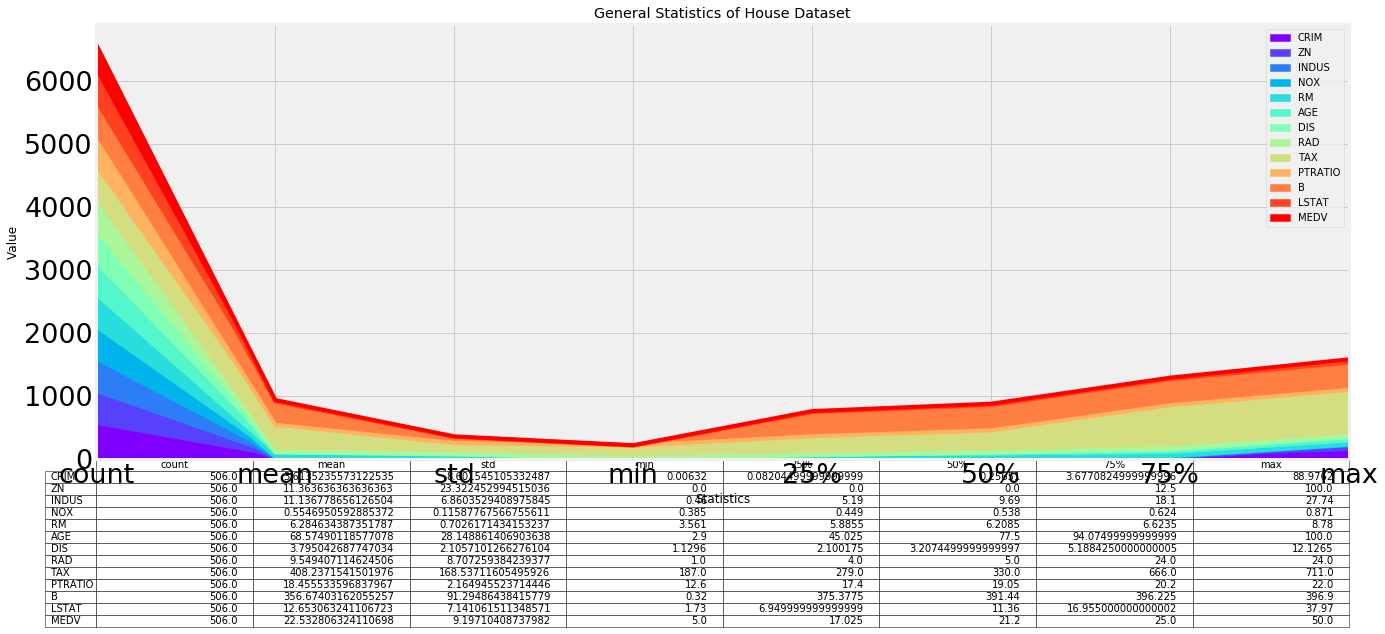

In [0]:
df.drop('CHAS',axis=1).describe().plot(kind="area",
                                       fontsize=27,figsize=(20,8),
                                       table=True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of House Dataset")

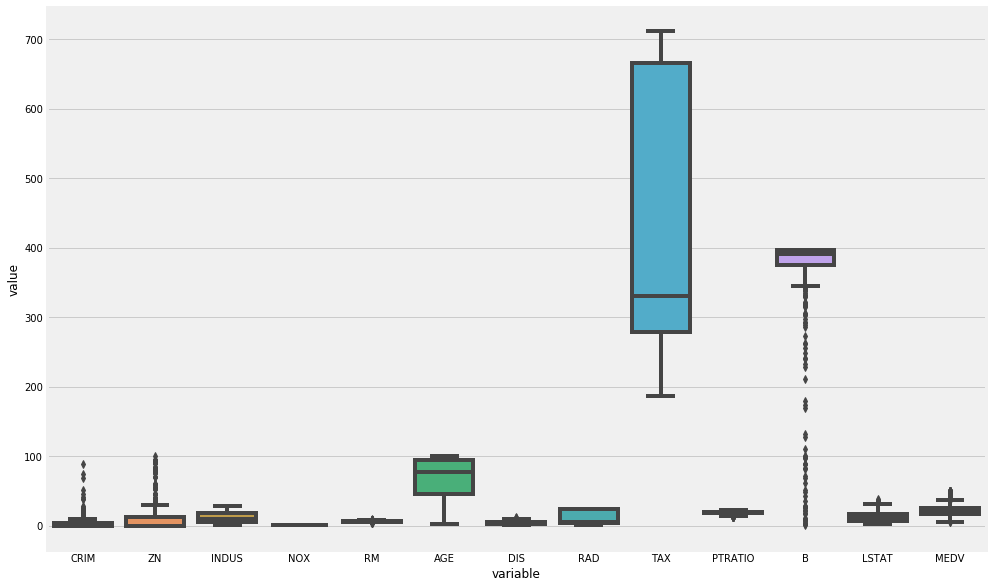

In [0]:
# df.drop('CHAS',axis=1).boxplot(figsize=(15,10))
import seaborn as sns, matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df.drop('CHAS', axis=1)))
plt.show()

0    471
1     35
Name: CHAS, dtype: int64

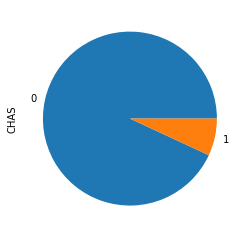

In [0]:
df['CHAS'].value_counts().plot.pie()
df['CHAS'].value_counts()

Tract bounds river (1) is much less than other cases (0)

## Evaluate attributes

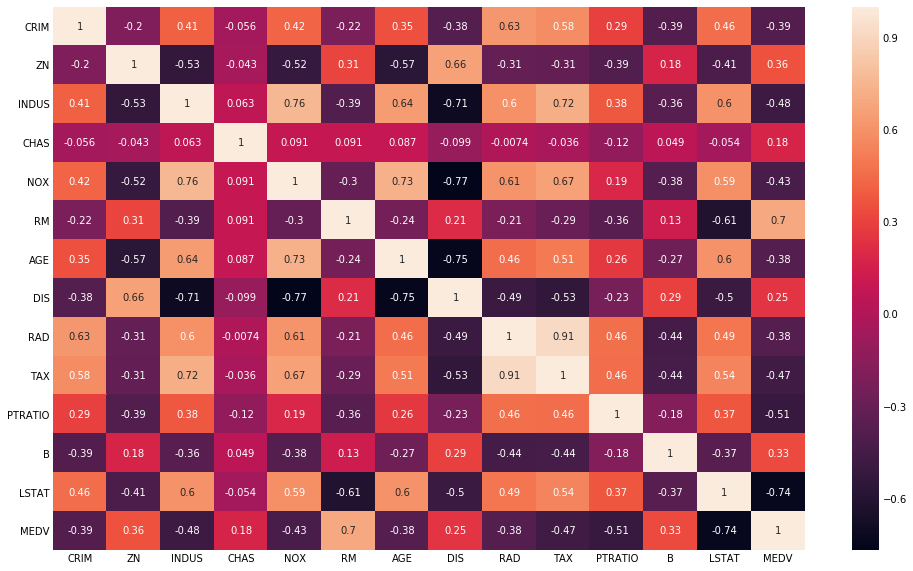

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

There are strong positive correlations between: RAD and TAX 0.91; NDUS and NOX 0.76; AGE and NOX 0.73; INDUS and TAX 0.72; MEDV and RM 0.7
  
  
There are strong negative correlations between: NOX and DIS -0.77; AGE and DIS -0.75; MEDV and LSTAT -0.74; INDUS and DIS -0.71


LSTAT, RM and PTRATIO are strongly correlated with MEDV but correlation between LSTAT and RM is alo strong. Therefore, for linear regression approach, LSTAT and PTRATIO are chosen.


INDUS, AGE and DIS are strongly correlated with NOX. Use INDUS and AGE for linear regression to predict NOX.

## MEDV Prediction

### Base model (mean)

In [0]:
from sklearn.metrics import r2_score
import numpy as np

y = df['MEDV'].to_numpy()
ypre = np.full((df.shape[0]), df['MEDV'].mean())
r2_score(ypre, y)

-1.672101578630687e+30

This is a bad model

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression


# with only 2 features

x = df[['LSTAT', 'PTRATIO']]

linear1 = LinearRegression().fit(x, y)

print(linear1.score(x,y))


# with full features

linear2 = LinearRegression().fit(df, y)

print(linear2.score(df,y))

0.6066546153493116
1.0


In [0]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV().fit(df, y)

enet.score(df, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9996323255567913

In [0]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(df,y)

lasso.score(df, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9999093718581881

Both LinearRegression, LassoCV and ElasticNetCV perform well with full features.